In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Iris\Iris_C_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,NaN,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,NaN,NaN,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,NaN,2.0
148,6.2,3.4,NaN,2.3


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	31
float64		column 2	33
float64		column 3	26
float64		column 4	30


In [4]:
df.describe()

,column 1,column 2,column 3,column 4
count,119.000000,117.000000,124.000000,120.000000
mean,5.901681,3.063248,3.702419,1.230000
std,0.812193,0.440532,1.821929,0.756773
min,4.400000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.350000,1.350000
75%,6.450000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

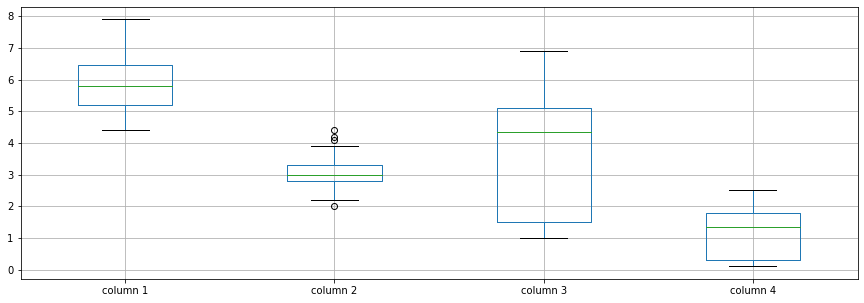

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    5.901681
column 2    3.063248
column 3    3.702419
column 4    1.230000
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4
column 1,1.000000,-0.143418,0.894772,0.809269
column 2,-0.143418,1.000000,-0.451856,-0.337936
column 3,0.894772,-0.451856,1.000000,0.964936
column 4,0.809269,-0.337936,0.964936,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [21]:
imputer = md.Midas(layer_structure = [4,4+23,4+23+23,4+23+23+23,4+23+23+23+23,4+23+23+23,4+23+23,4+23,4], vae_layer = False, seed = 4)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [4]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 11.623302035861546
Epoch: 1 , loss: 11.599869728088379
Epoch: 2 , loss: 11.64417192671034
Epoch: 3 , loss: 11.501425637139214
Epoch: 4 , loss: 11.620644569396973
Epoch: 5 , loss: 11.578802108764648
Epoch: 6 , loss: 11.716463830735949
Epoch: 7 , loss: 11.621739069620768
Epoch: 8 , loss: 11.677127520243326
Epoch: 9 , loss: 11.548849105834961
Epoch: 10 , loss: 11.488386048210991
Epoch: 11 , loss: 11.631737603081596
Epoch: 12 , loss: 11.548632091946072
Epoch: 13 , loss: 11.556269327799479
Epoch: 14 , loss: 11.567628118726942
Epoch: 15 , loss: 11.716904746161568
Epoch: 16 , loss: 11.717478646172417
Epoch: 17 , loss: 11.637379858228895
Epoch: 18 , loss: 11.729185740152994
Epoch: 19 , loss: 11.756106270684135
Epoch: 20 , loss: 11.588611602783203
Epoch: 21 , loss: 11.594408988952637
Epoch: 22 , loss: 11.484262148539225
Epoch: 23 , loss: 11.659086439344618
Epoch: 24 , loss: 11.645449002583822
Epoch: 25 , loss: 1

In [22]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(150, 4)

In [23]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    5.1
column 2    3.7
column 3    1.5
column 4    0.4
Name: 21, dtype: float64

In [24]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Iris.xlsx', header=None,names=column_names)

In [25]:
new_df-complete_df

,column 1,column 2,column 3,column 4
0,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.0
2,-4.685423,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.0
4,0.000000,-3.585673,-1.385094,0.0
...,...,...,...,...
145,0.000000,0.000000,0.000000,0.0
146,0.000000,0.000000,0.000000,0.0
147,0.000000,0.000000,-5.184631,0.0
148,0.000000,0.000000,-5.385655,0.0


Calculating NRMSE Value

In [26]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [27]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [28]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(42.699099512621906, 97.653468960401)

In [29]:
NRMS=numerator/denominator
NRMS


0.43725123098224616

In [30]:
new_df.iloc[66,:]

column 1    5.600000
column 2    0.015414
column 3    4.500000
column 4    1.500000
Name: 66, dtype: float64

In [31]:
imputations[-1]


,column 1,column 2,column 3,column 4
0,5.100000,3.500000,1.400000,0.2
1,4.900000,3.000000,1.400000,0.2
2,0.014577,3.200000,1.300000,0.2
3,4.600000,3.100000,1.500000,0.2
4,5.000000,0.014327,0.014906,0.2
...,...,...,...,...
145,6.700000,3.000000,5.200000,2.3
146,6.300000,2.500000,5.000000,1.9
147,6.500000,3.000000,0.015369,2.0
148,6.200000,3.400000,0.014345,2.3


In [32]:
imputations[-1].to_excel("Iris_C_20(imp).xlsx", index=False, header=False)